The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

Column description:

1) gender: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.

2) age: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

3) hypertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

4) heart_diesease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

5) smoking_history: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

6) bmi: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

7) HbA1c_level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

8) blood_glucose_level: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

9) diabetes: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [109]:
# Libraries

import pandas as pd
import numpy as np

import seaborn as sns

# Reading .csv file

In [110]:
data = pd.read_csv("data/diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Exploring data

In [111]:
data.shape

(100000, 9)

In [112]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [113]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [115]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [116]:
# Renaming columns

data.columns = ['gender', 'age', 'hypertension', 
                'heart_disease', 'smoking_history','bmi_score', 
                'haemoglobin_level', 'blood_glucose_level', 'is_diabetic']

In [117]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [118]:
# gender

data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [119]:
# age

data.age.value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

In [120]:
print(data.age.max())
print(data.age.min())

80.0
0.08


🎯 Decision: Converting age from float into int. Datatype of Age as float is illogical.

In [121]:
data.age = data.age.astype(int)

In [122]:
data.age.dtype

dtype('int64')

In [123]:
data.age.value_counts()

80    5621
51    1619
47    1574
48    1568
53    1542
      ... 
76     733
77     730
75     721
78     682
79     621
Name: age, Length: 81, dtype: int64

In [124]:
print(data.age.max())
print(data.age.min())

80
0


In [125]:
# hypertension

data.hypertension.value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [126]:
# heart_disease

data.heart_disease.value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

In [127]:
# smoking_history

data.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

🎯 Decision: Some on the values in smoking history are illogical. e.g not current, ever. 
          Hence combining not current into former, ever into current.

In [128]:
# cleaning Smoking_history column

def clean_smoking_history(value):
    
    if value == "No Info":
        return "no info"
    elif value == "ever":
        return "current"
    elif value == "not current":
        return "former"
    else:
        return value
    
data.smoking_history = data.smoking_history.apply(clean_smoking_history)

In [129]:
data.smoking_history.value_counts()

no info    35816
never      35095
former     15799
current    13290
Name: smoking_history, dtype: int64

In [130]:
# bmi_score

data.bmi_score.value_counts()

27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi_score, Length: 4247, dtype: int64

In [131]:
print(data.bmi_score.max())
print(data.bmi_score.min())

95.69
10.01


In [132]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,no info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [133]:
# haemoglobin_level

data.haemoglobin_level.value_counts()

6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: haemoglobin_level, dtype: int64

In [134]:
print(data.haemoglobin_level.max())
print(data.haemoglobin_level.min())

9.0
3.5


In [135]:
# blood_glucose_level

data.blood_glucose_level.value_counts()

130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: blood_glucose_level, dtype: int64

In [136]:
print(data.blood_glucose_level.max())
print(data.blood_glucose_level.min())

300
80


In [137]:
# is_diabetic

data.is_diabetic.value_counts()

0    91500
1     8500
Name: is_diabetic, dtype: int64

💡Insight: This dataset contains 91500 records of nondiabetic people and 8500 records of diabetic people.
            This results that our data is imbalanced, so our model will also is trained for looking at people with no diabtees sign.
            Hence it will not be efficient model.
            Therefore the dataset has to be balanced using any one of the techniques Over sampling/Undersampling/SMOTE 

In [138]:
data.corr()

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_90388/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,hypertension,heart_disease,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi_score,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
haemoglobin_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
is_diabetic,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_90388/160651264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

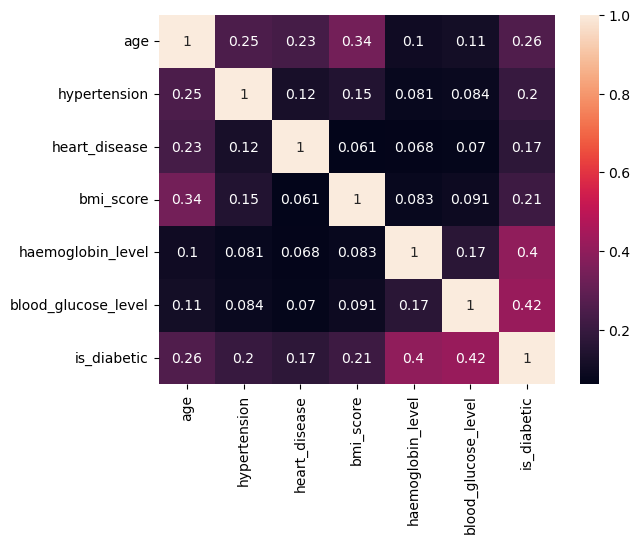

In [139]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True)

Observation: Feature haemoglobin_level, blood_glucose_level has some correlation with target (is_diabetic). 
    Whereas age, hypertension, heart_disease, bmi_score has almost no correlation with target (is_diabetic).  

In [140]:
# Converting hypertension and heart_disease into object datatype. 

data.hypertension = np.where((data.hypertension == 1), "Yes", "No")
data.heart_disease = np.where((data.heart_disease == 1), "Yes", "No")

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi_score            100000 non-null  float64
 6   haemoglobin_level    100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   is_diabetic          100000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [142]:
# Exporting cleaned data into .csv file

data.to_csv("data/diabetes_clean.csv", index = False)